# Data pH

Dataset harus disiapkan terlebih dahulu, buat csv biasa aja, ubah , menjadi . Lalu hapus sebagai delimiter nanti cukup gunakan , saja

In [63]:
import os
import pandas as pd

df = pd.read_csv('phdown2.csv', delimiter=',')
df

,Volume,Waktu,pHAwal,pHAkhir,DeltapH,Rata-rata Delta pH
0,40,1,6.8,6.6,0.2,0.13
1,40,1,6.6,6.5,0.1,NaN
2,40,1,6.5,6.4,0.1,NaN
3,40,1,6.4,6.2,0.2,NaN
4,40,1,6.2,6.1,0.1,NaN
...,...,...,...,...,...,...
345,100,5,6.6,6.6,0.0,NaN
346,100,5,6.6,6.3,0.3,NaN
347,100,5,6.3,6.4,0.1,NaN
348,100,5,6.4,6.2,0.2,NaN


Untuk dataset final, hapus bagian rata rata delta ph, phawal dan phakhir

In [64]:
dataset = df[['Volume', 'Waktu', 'DeltapH']]
volume = dataset.Volume
waktu = dataset.Waktu
dataset

,Volume,Waktu,DeltapH
0,40,1,0.2
1,40,1,0.1
2,40,1,0.1
3,40,1,0.2
4,40,1,0.1
...,...,...,...
345,100,5,0.0
346,100,5,0.3
347,100,5,0.1
348,100,5,0.2


In [65]:
average= dataset.groupby(['Volume', 'Waktu']).mean()[['DeltapH']]
# deltaph = average.DeltapH
average

DeltapH
Volume Waktu         
40     1         0.13
       2         0.21
       3         0.32
       4         0.48
       5         0.59
50     1         0.12
       2         0.18
       3         0.27
       4         0.37
       5         0.48
60     1         0.10
       2         0.16
       3         0.21
       4         0.36
       5         0.38
70     1         0.11
       2         0.16
       3         0.21
       4         0.29
       5         0.37
80     1         0.07
       2         0.04
       3         0.05
       4         0.12
       5         0.26
90     1         0.08
       2         0.07
       3         0.08
       4         0.17
       5         0.23
100    1         0.04
       2         0.04
       3         0.12
       4         0.10
       5         0.17

In [66]:
agregate = dataset.groupby(['Volume', 'Waktu']).mean()[['DeltapH']]
# deltaph = average.DeltapH
agregate

DeltapH
Volume Waktu         
40     1         0.13
       2         0.21
       3         0.32
       4         0.48
       5         0.59
50     1         0.12
       2         0.18
       3         0.27
       4         0.37
       5         0.48
60     1         0.10
       2         0.16
       3         0.21
       4         0.36
       5         0.38
70     1         0.11
       2         0.16
       3         0.21
       4         0.29
       5         0.37
80     1         0.07
       2         0.04
       3         0.05
       4         0.12
       5         0.26
90     1         0.08
       2         0.07
       3         0.08
       4         0.17
       5         0.23
100    1         0.04
       2         0.04
       3         0.12
       4         0.10
       5         0.17

Nantinya data diaverage dan jadilah dataset yang baik

In [67]:
ph = average.reset_index()
ph

,Volume,Waktu,DeltapH
0,40,1,0.13
1,40,2,0.21
2,40,3,0.32
3,40,4,0.48
4,40,5,0.59
5,50,1,0.12
6,50,2,0.18
7,50,3,0.27
8,50,4,0.37
9,50,5,0.48


<Axes: >

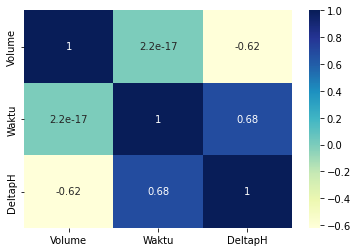

In [68]:
import seaborn as sb
sb.heatmap(ph.corr(), cmap="YlGnBu", annot=True)

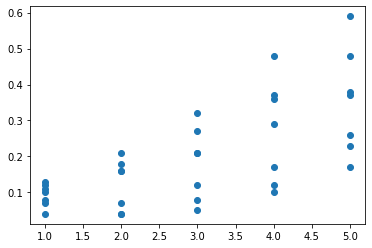

In [69]:
from matplotlib import pyplot

pyplot.scatter(ph.iloc[:,1],ph.iloc[:,2])

# Prediksi DeltapH sesudai dengan waktu dengan LinearRegression

In [70]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Membuat dataframe
df = ph

# Fitur (Volume dan Waktu) dan Target (DeltapH)
X = df[['Volume', 'Waktu']]
y = df['DeltapH']

# Membuat model regresi linear
model = LinearRegression()
model.fit(X, y)

# Membuat prediksi untuk waktu dari 1 hingga 10 detik dengan berbagai volume
prediksi = []
for volume in [40, 50, 60, 70, 80, 90, 100]:
    for waktu in range(1, 51):
        prediksi_deltaph = model.predict([[volume, waktu]])[0]
        prediksi.append({'Volume': volume, 'Waktu': waktu, 'Prediksi ΔpH': round(prediksi_deltaph, 2)})

# Menyusun hasil prediksi dalam bentuk tabel
tabel_prediksi = pd.DataFrame(prediksi)

# Menampilkan tabel prediksi
print(tabel_prediksi)


# Filter data untuk volume tertentu saja
filter_tabel_volume = tabel_prediksi[tabel_prediksi['Volume'] == 70]

# Menampilkan tabel hasil filter
print(filter_tabel_volume)


     Volume  Waktu  Prediksi ΔpH
0        40      1          0.20
1        40      2          0.27
2        40      3          0.33
3        40      4          0.40
4        40      5          0.47
..      ...    ...           ...
345     100     46          2.96
346     100     47          3.02
347     100     48          3.09
348     100     49          3.16
349     100     50          3.22

[350 rows x 3 columns]
     Volume  Waktu  Prediksi ΔpH
150      70      1          0.07
151      70      2          0.14
152      70      3          0.20
153      70      4          0.27
154      70      5          0.34
155      70      6          0.40
156      70      7          0.47
157      70      8          0.54
158      70      9          0.61
159      70     10          0.67
160      70     11          0.74
161      70     12          0.81
162      70     13          0.87
163      70     14          0.94
164      70     15          1.01
165      70     16          1.08
166      70     17 

# Linear Regression

In [71]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Membuat dataframe
df = ph

# Fitur (Volume dan DeltapH) dan Target (Waktu)
X = df[['Volume', 'DeltapH']]
y = df['Waktu']

# Membuat model regresi linear
model = LinearRegression()
model.fit(X, y)

# Membuat prediksi untuk DeltapH dari 0.05 hingga 0.6 dengan berbagai volume
prediksi = []
for volume in [40, 50, 60, 70, 80, 90, 100]:
    for deltaph in np.arange(0.05, 2, 0.05):
        prediksi_waktu = model.predict([[volume, deltaph]])[0]
        prediksi.append({'Volume': volume, 'ΔpH': round(deltaph, 2), 'Prediksi Waktu (detik)': round(prediksi_waktu, 2)})

# Menyusun hasil prediksi dalam bentuk tabel
tabel_prediksi = pd.DataFrame(prediksi)

# Menampilkan tabel prediksi
print(tabel_prediksi)


# Filter data untuk volume tertentu saja
tabel_predik = tabel_prediksi[tabel_prediksi['Volume'] == 70]

# Menampilkan tabel hasil filter
print(tabel_predik)

     Volume   ΔpH  Prediksi Waktu (detik)
0        40  0.05                   -0.19
1        40  0.10                    0.37
2        40  0.15                    0.94
3        40  0.20                    1.50
4        40  0.25                    2.06
..      ...   ...                     ...
268     100  1.75                   21.88
269     100  1.80                   22.44
270     100  1.85                   23.01
271     100  1.90                   23.57
272     100  1.95                   24.14

[273 rows x 3 columns]
     Volume   ΔpH  Prediksi Waktu (detik)
117      70  0.05                    1.26
118      70  0.10                    1.83
119      70  0.15                    2.39
120      70  0.20                    2.95
121      70  0.25                    3.52
122      70  0.30                    4.08
123      70  0.35                    4.65
124      70  0.40                    5.21
125      70  0.45                    5.77
126      70  0.50                    6.34
127      7

# Split Data

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ph[["Volume","DeltapH"]],ph["Waktu"],test_size=0.3,random_state=42)
print("Banyaknya data training: ", y_train.shape)
print("Banyaknya data test: ", y_test.shape)

Banyaknya data training:  (24,)
Banyaknya data test:  (11,)


# LinearRegression

In [73]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi dengan data test
y_pred = model.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ", model.coef_[0])
print("Koefisien DeltapH: ", model.coef_[1])
print("Intercept:", model.intercept_)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print("R-squared:", r2)
print("Model dapat dapat menjelaskan ", r2*100,"% dari variansi dalam data")
print("\n")

volume = 70
ph_awal = 6.6
ph_target = 6
deltaph = ph_awal - ph_target

x1 = volume
x2 = deltaph

a = model.coef_[0]
b = model.coef_[1]
c = model.intercept_

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = model.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)


Koefisien Volume:  0.04406105669083988
Koefisien DeltapH:  10.487825757297816
Intercept: -2.2503347763877177

Evaluasi Model:
Mean Squared Error (MSE): 0.3266525368464476
Root Mean Squared Error (RMSE): 0.57153524549799
Mean Absolute Error (MAE): 0.4695221003371206
R-squared: 0.8419001721663194
Model dapat dapat menjelaskan  84.19001721663194 % dari variansi dalam data


Manual:  7.1266346463497605
Model 7.1266346463497605
Selisih 0.0


# Ridge Regression

In [74]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Membuat model
rdg = Ridge(alpha = 0.1)
rdg.fit(X_train, y_train)

# Melakukan prediksi dengan data test
y_pred = rdg.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ", rdg.coef_[0])
print("Koefisien DeltapH: ", rdg.coef_[1])
print("Intercept: ",rdg.intercept_)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print("R-squared:", r2)
print("Model dapat dapat menjelaskan ", r2*100,"% dari variansi dalam data")
print("\n")

volume = 70
ph_awal = 6.6
ph_target = 6
deltaph = ph_awal - ph_target

x1 = volume
x2 = deltaph

a = rdg.coef_[0]
b = rdg.coef_[1]
c = rdg.intercept_

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = rdg.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)

Koefisien Volume:  0.03312908376534386
Koefisien DeltapH:  7.672796525590191
Intercept:  -0.9596245483509063

Evaluasi Model:
Mean Squared Error (MSE): 0.6110778770745997
Root Mean Squared Error (RMSE): 0.7817147031203902
Mean Absolute Error (MAE): 0.666906332166305
R-squared: 0.7042383074958938
Model dapat dapat menjelaskan  70.42383074958937 % dari variansi dalam data


Manual:  5.9630892305772765
Model 5.9630892305772765
Selisih 0.0


## Ridge Regression With CV

In [75]:
from sklearn.linear_model import RidgeCV

# Membuat model
rdg_cv = RidgeCV([.1,.3,.5,.7,.9,1,10],cv=5)
rdg_cv.fit(X_train,y_train)

# Melakukan prediksi dengan data test
y_pred = rdg_cv.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ",rdg_cv.coef_[0])
print("Koefisien DeltapH: ",rdg_cv.coef_[1])
print("Intercept: ", rdg_cv.intercept_)


# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print("R-squared:", r2)
print("Model dapat dapat menjelaskan ", r2*100,"% dari variansi dalam data")
print("\n")

volume = 70
ph_awal = 6.6
ph_target = 6
deltaph = ph_awal - ph_target

x1 = volume
x2 = deltaph

a = rdg_cv.coef_[0]
b = rdg_cv.coef_[1]
c = rdg_cv.intercept_

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = rdg_cv.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)

Koefisien Volume:  0.03312908376534386
Koefisien DeltapH:  7.672796525590191
Intercept:  -0.9596245483509063

Evaluasi Model:
Mean Squared Error (MSE): 0.6110778770745997
Root Mean Squared Error (RMSE): 0.7817147031203902
Mean Absolute Error (MAE): 0.666906332166305
R-squared: 0.7042383074958938
Model dapat dapat menjelaskan  70.42383074958937 % dari variansi dalam data


Manual:  5.9630892305772765
Model 5.9630892305772765
Selisih 0.0


# Lasso

In [76]:
from sklearn.linear_model import Lasso

# Membuat model
lss = Lasso(alpha=0.2)
lss.fit(X_train,y_train)

# Melakukan prediksi dengan data test
y_pred = lss.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ", lss.coef_[0])
print("Koefisien DeltapH: ", lss.coef_[1])
print("Intercept: ", lss.intercept_)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print("R-squared:", r2)
print("Model dapat dapat menjelaskan ", r2*100,"% dari variansi dalam data")
print("\n")

# Testing
volume = 70
ph_awal = 6.6
ph_target = 6
deltaph = ph_awal - ph_target

x1 = volume
x2 = deltaph

a = lss.coef_[0]
b = lss.coef_[1]
c = lss.intercept_

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = lss.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)

Koefisien Volume:  0.0029333333333333325
Koefisien DeltapH:  0.0
Intercept:  2.586333333333333

Evaluasi Model:
Mean Squared Error (MSE): 2.528421767676768
Root Mean Squared Error (RMSE): 1.5901011815846084
Mean Absolute Error (MAE): 1.4364545454545457
R-squared: -0.22375613555555574
Model dapat dapat menjelaskan  -22.375613555555574 % dari variansi dalam data


Manual:  2.7916666666666665
Model 2.7916666666666665
Selisih 0.0


# Lasso CV

In [77]:
from sklearn.linear_model import LassoCV

# Membuat model
lss_cv = LassoCV(alphas=[.1,.3,.5,.7,.9])
lss_cv.fit(X_train,y_train)

# Melakukan prediksi dengan data test
y_pred = lss_cv.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ", lss_cv.coef_[0])
print("Koefisien DeltapH: ", lss_cv.coef_[1])
print("Intercept: ", lss_cv.intercept_)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print("R-squared:", r2)
print("Model dapat dapat menjelaskan ", r2*100,"% dari variansi dalam data")
print("\n")

# Testing
volume = 70
ph_awal = 6.6
ph_target = 6
deltaph = ph_awal - ph_target

x1 = volume
x2 = deltaph

a = lss_cv.coef_[0]
b = lss_cv.coef_[1]
c = lss_cv.intercept_

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = lss_cv.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)

Koefisien Volume:  0.009534961070334181
Koefisien DeltapH:  1.6485282652011735
Intercept:  1.8164941155723882

Evaluasi Model:
Mean Squared Error (MSE): 1.9764150258564153
Root Mean Squared Error (RMSE): 1.4058502857190787
Mean Absolute Error (MAE): 1.271642708077316
R-squared: 0.04341512748549503
Model dapat dapat menjelaskan  4.341512748549503 % dari variansi dalam data


Manual:  3.473058349616484
Model 3.473058349616484
Selisih 0.0


# ElasticNetCV

In [78]:
from sklearn.linear_model import ElasticNetCV

# Membuat model
eln_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1])
eln_cv.fit(X_train,y_train)

# Melakukan prediksi dengan data test
y_pred = eln_cv.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ", eln_cv.coef_[0])
print("Koefisien DeltapH: ", eln_cv.coef_[1])
print("Intercept: ", eln_cv.intercept_)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print("R-squared:", r2)
print("Model dapat dapat menjelaskan ", r2*100,"% dari variansi dalam data")
print("\n")

# Test
volume = 70
ph_awal = 6.6
ph_target = 6
deltaph = ph_awal - ph_target

x1 = volume
x2 = deltaph

a = eln_cv.coef_[0]
b = eln_cv.coef_[1]
c = eln_cv.intercept_

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = eln_cv.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)

Koefisien Volume:  0.04284130412910544
Koefisien DeltapH:  10.17459434027532
Intercept:  -2.106482232555441

Evaluasi Model:
Mean Squared Error (MSE): 0.3471545214528571
Root Mean Squared Error (RMSE): 0.589198202180605
Mean Absolute Error (MAE): 0.4872372767626713
R-squared: 0.8319772116168171
Model dapat dapat menjelaskan  83.19772116168171 % dari variansi dalam data


Manual:  6.997165660647127
Model 6.997165660647127
Selisih 0.0


# GridSearchCV

In [232]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
params = {
    "max_depth": range(2,10),
    "min_samples_split": range(2,10),
    "min_samples_leaf": range(2,10)
}

dtr = DecisionTreeRegressor()
gs = GridSearchCV(dtr,params)

gs.fit(X_train,y_train)

y_pred_train = gs.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,y_pred_train)))

0.6428020258558963


# SVR

In [79]:
from sklearn.svm import SVR

# Membuat model
svr = SVR(kernel="linear")
svr.fit(X_train,y_train)

# Melakukan prediksi dengan data test
y_pred = svr.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ", svr.coef_[0][0])
print("Koefisien DeltapH: ", svr.coef_[0][1])
print("Intercept: ", svr.intercept_[0])

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print("R-squared:", r2)
print("Model dapat dapat menjelaskan ", r2*100,"% dari variansi dalam data")
print("\n")

# Test
volume = 70
ph_awal = 6.6
ph_target = 6
deltaph = ph_awal - ph_target

x1 = volume
x2 = deltaph

a = svr.coef_[0][0]
b = svr.coef_[0][1]
c = svr.intercept_[0]

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = svr.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)

Koefisien Volume:  0.008914468202362968
Koefisien DeltapH:  1.6299732565953922
Intercept:  2.013927410596618

Evaluasi Model:
Mean Squared Error (MSE): 1.8287745760018466
Root Mean Squared Error (RMSE): 1.3523219202548802
Mean Absolute Error (MAE): 1.2294634863926914
R-squared: 0.11487310521510641
Model dapat dapat menjelaskan  11.48731052151064 % dari variansi dalam data


Manual:  3.61592413871926
Model 3.6159241387156653
Selisih 3.594902153736257e-12


## Regresi Polynomial

In [80]:
from sklearn.preprocessing import PolynomialFeatures

# membuat fitur polinomial
poly = PolynomialFeatures(degree=2)  # Ubah degree sesuai kebutuhan
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# memodelkan
model = LinearRegression()
model.fit(X_poly_train, y_train)

# melakukan prediksi
y_pred = model.predict(X_poly_test)

# menampilkan koefisien dan intercept
coefficients = model.coef_
intercept = model.intercept_

print("Koefisien dan Intercept:")
print("Intercept:", intercept)
for i in range(len(coefficients)):
    print(f"Koefisien untuk fitur {i}: {coefficients[i]}")

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)
print("Model dapat menjelaskan ", r2*100, "% dari variansi dalam data")
print("\n")

# test
# Test
volume = 70
ph_awal = 6.6
ph_target = 6
deltaph = ph_awal - ph_target

x1 = volume
x2 = deltaph

koef_volume = coefficients[0]
koef_deltaph = coefficients[1]
koef_volume2 = coefficients[2]
koef_deltaph2 = coefficients[3]
koef_voldel = coefficients[4]

volume2 = volume * volume
deltaph2 = deltaph * deltaph

X_test_poly = poly.transform([[x1, x2]])
predicted_time = model.predict(X_test_poly)[0]

# manual
manual = intercept +  (koef_volume * volume) + (koef_deltaph * deltaph) + (koef_volume2 * volume2) + (koef_deltaph2 * deltaph2) 
print("Manual: ", manual)

# pakai model
print("Model", predicted_time)

Koefisien dan Intercept:
Intercept: -0.7690288484290302
Koefisien untuk fitur 0: 0.0
Koefisien untuk fitur 1: 0.007158901454703836
Koefisien untuk fitur 2: 3.6926793233835
Koefisien untuk fitur 3: 0.00012219447529707053
Koefisien untuk fitur 4: 0.16580327779222126
Koefisien untuk fitur 5: -2.4960029612243897

Evaluasi Model:
Mean Squared Error (MSE): 0.2729049615709055
R-squared: 0.8679139985996818
Model dapat menjelaskan  86.79139985996818 % dari variansi dalam data


Manual:  18093.363995061605
Model 8.61163137761849


# Kontrol PID

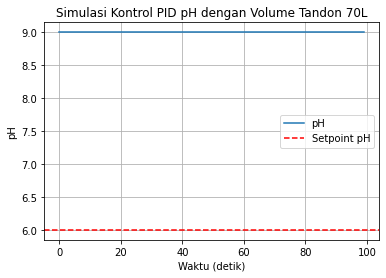

Total durasi relay yang diperlukan: 0.00 detik


In [42]:
import matplotlib.pyplot as plt
import numpy as np

class PIDController:
    def __init__(self, kp, ki, kd):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.previous_error = 0
        self.integral = 0

    def compute(self, setpoint, current_value, dt):
        # Menghitung error
        error = setpoint - current_value
        # Integral dari error
        self.integral += error * dt
        # Derivatif dari error
        derivative = (error - self.previous_error) / dt
        # Output PID
        output = self.kp * error + self.ki * self.integral + self.kd * derivative
        # Menyimpan error untuk langkah berikutnya
        self.previous_error = error
        return output

def simulate_pid(setpoint, initial_pH, volume_tandon, kp, ki, kd, simulation_time, dt):
    pid = PIDController(kp, ki, kd)
    pH_current = initial_pH
    time_values = np.arange(0, simulation_time, dt)
    pH_values = []
    relay_duration_total = 0

    for t in time_values:
        # Hitung durasi relay menyala dari kontrol PID
        relay_duration = pid.compute(setpoint, pH_current, dt)
        
        # Sesuaikan durasi relay dengan volume tandon
        relay_duration_adjusted = max(0, relay_duration * volume_tandon / 100)  # Normalisasi untuk tandon 100L
        relay_duration_total += relay_duration_adjusted
        
        # Simulasikan perubahan pH berdasarkan durasi relay menyala
        deltaph = relay_duration_adjusted * 0.02 / (volume_tandon / 100)
        pH_current -= deltaph  # Karena kita ingin menurunkan pH, maka perubahan negatif
        
        # Simpan data untuk visualisasi
        pH_values.append(pH_current)
        
        # Hindari undershoot pH melebihi setpoint
        if pH_current <= setpoint:
            pH_current = setpoint
            break

    # Plot hasil simulasi
    plt.plot(time_values[:len(pH_values)], pH_values, label="pH")
    plt.axhline(y=setpoint, color='r', linestyle='--', label="Setpoint pH")
    plt.xlabel("Waktu (detik)")
    plt.ylabel("pH")
    plt.title(f"Simulasi Kontrol PID pH dengan Volume Tandon {volume_tandon}L")
    plt.legend()
    plt.grid()
    plt.show()
    
    return relay_duration_total

# Parameter simulasi untuk skenario yang diminta
setpoint = 6
initial_pH = 9
volume_tandon = 70  # dalam liter
kp = 1.2
ki = 0.1
kd = 0.05
simulation_time = 100  # waktu simulasi dalam detik
dt = 1  # waktu sampling dalam detik

relay_duration = simulate_pid(setpoint, initial_pH, volume_tandon, kp, ki, kd, simulation_time, dt)
print(f"Total durasi relay yang diperlukan: {relay_duration:.2f} detik")


In [16]:
# Contoh prediksi: Menghitung durasi nyala pompa untuk Volume = 80 liter dan DeltapH = 2
volume_test = 80
deltaph_test = 2

# Menggunakan model polinomial untuk prediksi
X_test_poly = poly.transform([[volume_test, deltaph_test]])
predicted_time = model.predict(X_test_poly)
predicted_time = max(predicted_time[0], 0)  # Menghindari prediksi negatif

print(f'Predicted Waktu untuk Volume {volume_test} liter dan DeltapH {deltaph_test} adalah: {predicted_time:.2f} detik')


Predicted Waktu untuk Volume 80 liter dan DeltapH 2 adalah: 24.93 detik


In [104]:
# Menampilkan seluruh data dengan prediksi
ph['Predicted_Waktu'] = model.predict(X_poly)
ph['Predicted_Waktu'] = ph['Predicted_Waktu'].apply(lambda x: max(x, 0))  # Pastikan prediksi tidak negatif
print(ph)

    Volume  Waktu  DeltapH  Predicted_Waktu
0       40      1     0.13         1.069248
1       40      2     0.21         1.799505
2       40      3     0.32         2.763878
3       40      4     0.48         4.084479
4       40      5     0.59         4.935932
5       50      1     0.12         1.272405
6       50      2     0.18         1.917512
7       50      3     0.27         2.859507
8       50      4     0.37         3.870050
9       50      5     0.48         4.937734
10      60      1     0.10         1.375392
11      60      2     0.16         2.117911
12      60      3     0.21         2.726222
13      60      4     0.36         4.494124
14      60      5     0.38         4.723381
15      70      1     0.11         1.892498
16      70      2     0.16         2.587689
17      70      3     0.21         3.273376
18      70      4     0.29         4.350704
19      70      5     0.37         5.403698
20      80      1     0.07         1.715867
21      80      2     0.04      

## Regresi Linear Tingkat Lanjut dengan Statsmodel

In [115]:
import statsmodels.api as sm
from tabulate import tabulate

In [116]:
# Menambahkan konstanta untuk intercept
X = sm.add_constant(ph[['Volume', 'DeltapH']])
y = ph['Waktu']

# Membuat model regresi linear
model = sm.OLS(y, X).fit()

# Menampilkan ringkasan model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Waktu   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     49.34
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           1.67e-10
Time:                        22:17:27   Log-Likelihood:                -37.169
No. Observations:                  35   AIC:                             80.34
Df Residuals:                      32   BIC:                             85.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6974      0.729     -3.699      0.0

In [121]:
# testing prediksi
volume_test = 45
deltaph_test = 0.13

# Membbuat prediksi dengan model
X_test = pd.DataFrame({'const': 1, 'Volume': [volume_test], 'DeltapH': [deltaph_test]})
predicted_time = model.predict(X_test)
print(f'Predicted Waktu untuk Volume {volume_test} liter dan DeltapH {deltaph_test} adalah: {predicted_time[0]:.2f} detik')

Predicted Waktu untuk Volume 45 liter dan DeltapH 0.13 adalah: 0.95 detik


In [118]:
# Membuat prediksi
ph['Predicted_Waktu']

# Menampilkan tabel prediksi
print("\nTabel Prediksi Waktu:")
print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))


Tabel Prediksi Waktu:
+--------+-------+---------------------+-----------------------+
| Volume | Waktu |       DeltapH       |    Predicted_Waktu    |
+--------+-------+---------------------+-----------------------+
|  40.0  |  1.0  |        0.13         |  0.19921428571428565  |
|  40.0  |  2.0  | 0.21000000000000002 |  0.2662142857142857   |
|  40.0  |  3.0  |        0.32         |  0.3332142857142857   |
|  40.0  |  4.0  |        0.48         |  0.40021428571428563  |
|  40.0  |  5.0  |        0.59         |  0.4672142857142857   |
|  50.0  |  1.0  | 0.12000000000000002 |  0.1561428571428571   |
|  50.0  |  2.0  |        0.18         |  0.2231428571428571   |
|  50.0  |  3.0  |        0.27         |  0.2901428571428571   |
|  50.0  |  4.0  |        0.37         |  0.3571428571428571   |
|  50.0  |  5.0  |        0.48         |  0.4241428571428571   |
|  60.0  |  1.0  |         0.1         |  0.11307142857142854  |
|  60.0  |  2.0  |        0.16         |  0.18007142857142855  |
| 

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

lr = LinearRegression()
rdg = Ridge()
rdg_cv = RidgeCV([.1,.5,1,5,10,15],cv=5)
lss = Lasso()
lss_cv = LassoCV(alphas=[.1,.3,.5,.7,.9])
eln = ElasticNet()
eln_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1])
svr = SVR(kernel="linear")
dtr = DecisionTreeRegressor()
params = {
    "max_depth": range(2,10),
    "min_samples_split": range(2,10),
    "min_samples_leaf": range(2,10)
}
gs = GridSearchCV(dtr,params)

lr.fit(X_train,y_train)
rdg.fit(X_train,y_train)
rdg_cv.fit(X_train,y_train)
lss.fit(X_train,y_train)
lss_cv.fit(X_train,y_train)
eln.fit(X_train,y_train)
eln_cv.fit(X_train,y_train)
svr.fit(X_train,y_train)
gs.fit(X_train,y_train)

print("RidgeCV best params:",rdg_cv.alpha_)
print("LassoCV best params:",lss_cv.alpha_)
print("ElasticnetCV best params:",eln_cv.alpha_)
print("Decision Tree best params:",gs.best_params_)

RidgeCV best params: 0.1
LassoCV best params: 0.1
ElasticnetCV best params: 0.0018518518518518515
Decision Tree best params: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}


0.917010954628728


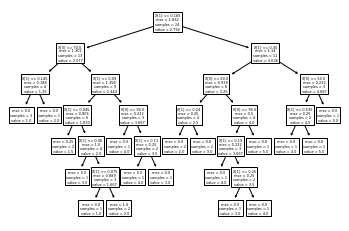

In [41]:
from sklearn import tree

# dtr = DecisionTreeRegressor(max_depth=2,min_samples_leaf=3,min_samples_split=8)
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

tree.plot_tree(dtr)

print(np.sqrt(mean_squared_error(y_test,dtr.predict(X_test))))

In [79]:
from sklearn.metrics import mean_squared_error
import numpy as np

print("Multiple Linear Regression")
print("Training RMSE",np.sqrt(mean_squared_error(y_train,lr.predict(X_train))))
print("Testing RMSE",np.sqrt(mean_squared_error(y_test,lr.predict(X_test))))
print("Testing R-squared",lr.score(X_test,y_test))
print()
print("Ridge Regression")
print("Training RMSE",np.sqrt(mean_squared_error(y_train,rdg.predict(X_train))))
print("Testing RMSE",np.sqrt(mean_squared_error(y_test,rdg.predict(X_test))))
print("Testing R-squared",rdg.score(X_test,y_test))
print()
print("Ridge Regression CV")
print("Training RMSE",np.sqrt(mean_squared_error(y_train,rdg_cv.predict(X_train))))
print("Testing RMSE",np.sqrt(mean_squared_error(y_test,rdg_cv.predict(X_test))))
print("Testing R-squared",rdg_cv.score(X_test,y_test))
print()
print("Lasso Regression")
print("Training RMSE",np.sqrt(mean_squared_error(y_train,lss.predict(X_train))))
print("Testing RMSE",np.sqrt(mean_squared_error(y_test,lss.predict(X_test))))
print("Testing R-squared",lss.score(X_test,y_test))
print()
print("Lasso Regression CV")
print("Training RMSE",np.sqrt(mean_squared_error(y_train,lss_cv.predict(X_train))))
print("Testing RMSE",np.sqrt(mean_squared_error(y_test,lss_cv.predict(X_test))))
print("Testing R-squared",lss_cv.score(X_test,y_test))
print()
print("Elasticnet Regression")
print("Training RMSE",np.sqrt(mean_squared_error(y_train,eln.predict(X_train))))
print("Testing RMSE",np.sqrt(mean_squared_error(y_test,eln.predict(X_test))))
print("Testing R-squared",eln.score(X_test,y_test))
print()
print("Elasticnet Regression CV")
print("Training RMSE",np.sqrt(mean_squared_error(y_train,eln_cv.predict(X_train))))
print("Testing RMSE",np.sqrt(mean_squared_error(y_test,eln_cv.predict(X_test))))
print("Testing R-squared",eln_cv.score(X_test,y_test))
print()
print("Decision Tree Regression")
print("Training RMSE",np.sqrt(mean_squared_error(y_train,gs.predict(X_train))))
print("Testing RMSE",np.sqrt(mean_squared_error(y_test,gs.predict(X_test))))
print("Testing R-squared",gs.score(X_test,y_test))
print()
print("Support Vector Regression")
print("Training RMSE",np.sqrt(mean_squared_error(y_train,svr.predict(X_train))))
print("Testing RMSE",np.sqrt(mean_squared_error(y_test,svr.predict(X_test))))
print("Testing R-squared",svr.score(X_test,y_test))

Multiple Linear Regression
Training RMSE 0.6910475306671169
Testing RMSE 0.7343860786956624
Testing R-squared 0.7546689006675902

Ridge Regression
Training RMSE 0.6994395453078222
Testing RMSE 0.7805636599248249
Testing R-squared 0.7228464853735949

Ridge Regression CV
Training RMSE 0.6911505612006701
Testing RMSE 0.7387350317842284
Testing R-squared 0.7517546499646067

Lasso Regression
Training RMSE 1.3635890143294642
Testing RMSE 1.5351006777762464
Testing R-squared -0.07195723684210509

Lasso Regression CV
Training RMSE 0.7313914489402078
Testing RMSE 0.8585806096531868
Testing R-squared 0.6646750366317105

Elasticnet Regression
Training RMSE 1.1571759991910202
Testing RMSE 1.3754058779438234
Testing R-squared 0.13947104955273404

Elasticnet Regression CV
Training RMSE 0.691746703158768
Testing RMSE 0.7461530139509933
Testing R-squared 0.7467441250089989

Decision Tree Regression
Training RMSE 0.4859126579037751
Testing RMSE 1.044465935734187
Testing R-squared 0.5037593984962405

Su